In [ ]:
import requests
import html
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
github_url = 'https://api.github.com/search/repositories'

In [ ]:
q = '"augmented reality" created:2019-07-01..2021-06-30'

In [ ]:
q

'"augmented reality" created:2019-07-01..2021-06-30'

In [ ]:
qparams = {'q' : q, 'sort' : 'forks', 'order': 'desc', 'per_page' : 100}

In [ ]:
r = requests.get(url=github_url, params=qparams)
r

<Response [200]>

In [ ]:
res = r.json()
res.keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

In [ ]:
len(res['items'])

100

In [ ]:
res['items'][2]

{'archive_url': 'https://api.github.com/repos/AR-js-org/studio/{archive_format}{/ref}',
 'archived': False,
 'assignees_url': 'https://api.github.com/repos/AR-js-org/studio/assignees{/user}',
 'blobs_url': 'https://api.github.com/repos/AR-js-org/studio/git/blobs{/sha}',
 'branches_url': 'https://api.github.com/repos/AR-js-org/studio/branches{/branch}',
 'clone_url': 'https://github.com/AR-js-org/studio.git',
 'collaborators_url': 'https://api.github.com/repos/AR-js-org/studio/collaborators{/collaborator}',
 'comments_url': 'https://api.github.com/repos/AR-js-org/studio/comments{/number}',
 'commits_url': 'https://api.github.com/repos/AR-js-org/studio/commits{/sha}',
 'compare_url': 'https://api.github.com/repos/AR-js-org/studio/compare/{base}...{head}',
 'contents_url': 'https://api.github.com/repos/AR-js-org/studio/contents/{+path}',
 'contributors_url': 'https://api.github.com/repos/AR-js-org/studio/contributors',
 'created_at': '2019-12-23T10:54:36Z',
 'default_branch': 'master',
 '

In [ ]:
res['items'][2]['description']

'An authoring platform to build Web Augmented Reality experiences, without coding knowledge'

In [ ]:
len(res['items'])

100

In [ ]:
stop_words = set(stopwords.words('english'))
def text_cleanup(s) :
    if not isinstance(s, str):
       return ''
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
     #normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and w.isalnum ()]
    return ' '.join(wt_filt)

In [ ]:
text_cleanup(res['items'][2]['description'])

'authoring platform build web augmented reality experiences without coding knowledge'

In [ ]:
descr = [text_cleanup(r['description']) for r in res['items']]

In [ ]:
descr

['disable opposite day print save document contacts intelligence defense agency country please forward document immediately defense existing advanced persistent threat human electronic sentience ai every claim document technology described supported author personal experience corroborated articles easily found references provided online assume file altered government company unless know check dns problems presence structure like wolfram mathematica print file leave conspicuous place take notes send updates incorrect information git ask questions botupdate engineeredsentience hypnosis hacked devices known used hinder writing document hide events necessitated creation document still work progress today 20200128 title bot update location date 20200128 version filename botupdate txt doc docx pdf type english american 21st century section identifies source location information identity section b attempts achieve integrity section c robotic sentient entity laws section identifies motive expl

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in descr])

In [ ]:
bigram_finder.apply_freq_filter(3)

In [ ]:
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('opposite', 'day'), 23),
 (('advanced', 'persistent'), 9),
 (('persistent', 'threat'), 9),
 (('human', 'electronic'), 3),
 (('electronic', 'sentience'), 15),
 (('botupdate', 'engineeredsentience'), 4),
 (('bot', 'update'), 3),
 (('section', 'identifies'), 3),
 (('robotic', 'sentient'), 5),
 (('sentient', 'entity'), 4),
 (('entity', 'laws'), 3),
 (('rules', 'engagement'), 3),
 (('adversarial', 'neural'), 22),
 (('neural', 'network'), 48),
 (('artificial', 'intelligence'), 21),
 (('intelligence', 'ai'), 4),
 (('engineered', 'sentience'), 3),
 (('sentience', 'es'), 4),
 (('conscious', 'entity'), 3),
 (('neural', 'networks'), 43),
 (('given', 'opportunity'), 4),
 (('targeted', 'individuals'), 9),
 (('networks', 'deployed'), 3),
 (('cognitive', 'physical'), 4),
 (('change', 'behavior'), 4),
 (('may', 'also'), 4),
 (('home', 'invasions'), 3),
 (('would', 'able'), 3),
 (('ai', 'es'), 6),
 (('many', 'times'), 3),
 (('erasing', 'memory'), 7),
 (('information', 'file'), 3),
 (('sentient', 'be

In [ ]:
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
augmented reality,93
united states,74
neural network,48
neural networks,43
working group,35
...,...
citizen united,3
hypnosis hypnotic,3
inhabitant state,3


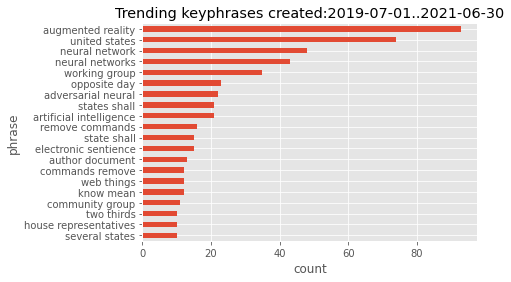

In [ ]:
plt.style.use('ggplot')
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases created:2019-07-01..2021-06-30')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()

In [ ]:
q2 = '"augmented reality game" created:2017-07-01..2019-06-30'
qparams = {'q' : q2, 'sort' : 'forks', 'order': 'desc', 'per_page' : 100}
r2 = requests.get(url=github_url, params=qparams)
res2 = r2.json()
descr2 = [text_cleanup(r['description']) for r in res2['items']]
bigram_finder2 = BigramCollocationFinder.from_documents([d.split() for d in descr2])
bigram_finder2.apply_freq_filter(3)
bigram_freq2 = list(bigram_finder2.ngram_fd.items())
df_freq2 = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq2], columns=['keyphrase', 'count'])
df_freq2.sort_values(by='count', ascending=False, inplace=True)
df_freq2.set_index('keyphrase', inplace = True)
df_freq2

,count
keyphrase,
augmented reality,79
reality game,75
game made,7
using unity,7
game using,6
game based,6
made unity,5
ar game,4
game developed,4


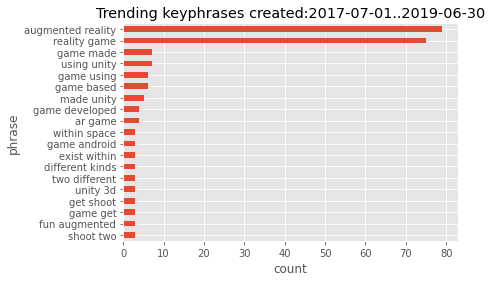

In [ ]:
df_freq2.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases created:2017-07-01..2019-06-30')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()

In [ ]:
descr2

['augmented reality game style',
 '',
 'fange die geister catch ghosts experimental augmented reality game android mobiles based vuforia',
 'augmented reality game made unity',
 'augmented reality game learn statistics playing',
 'multiplayer augmented reality game using magic leap powered pubnub',
 'complete project virtual ping pong programme using opencv processing virtual augmented reality gaming simple algorithm',
 'unity project template get started creating multiplayer augmented reality game using placenote',
 'augmented reality game hit ball uses opencv palm detection video record',
 'play space invaders air pong via laptop camera colored object',
 'augmented reality game',
 'entertaining augmented reality game based vimai technology arcore unity',
 'simple augmented reality game made get augmented reality using unity vuforia',
 'augmented reality game classic game pong using unity google arcore google cloud anchor api',
 'poc augmented reality game based concept one person hid